In [34]:
import pandas as pd
import numpy as np
import seaborn as sns #for representation of relationship between variables.
from matplotlib import pyplot as plt

In [35]:
xl = pd.read_excel('ANZ synthesised transaction dataset.xlsx', header=0)
xl.head() #checkinh first five entries

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [36]:
xl.info() #gives the info about the whole dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      883 non-null    float64       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float64       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int64         
 14  mercha

In [37]:
xl.tail() #checking last 5 entries

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
12038,authorized,0.0,NaN,ACC-3021093232,AUD,149.83 -29.47,POS,32aa73dc-b7c2-4161-b14d-6271b96ce792,NaN,Melissa,...,30,Ringwood,VIC,2018-10-31T23:09:06.000+0000,9.79,f2e3e695c2ee4c50a4c8747f852cbe2e,Australia,CUS-55310383,145.23 -37.81,debit
12039,authorized,1.0,NaN,ACC-1608363396,AUD,151.22 -33.87,SALES-POS,296a0500-8552-48ac-ac81-ec37065b568e,NaN,Robert,...,20,Casula,NSW,2018-10-31T23:21:46.000+0000,63.87,56e147e5485f4683b9076fcaaed76640,Australia,CUS-2688605418,150.88 -33.96,debit
12040,authorized,1.0,NaN,ACC-3827517394,AUD,151.12 -33.89,POS,e5975ab4-08f7-4725-a369-24cc0e35ed6e,NaN,Craig,...,28,Kings Park,NSW,2018-10-31T23:34:25.000+0000,43.96,2fdd4681827343f6af2e6519644a684a,Australia,CUS-2663907001,150.92 -33.74,debit
12041,authorized,1.0,NaN,ACC-2920611728,AUD,144.96 -37.76,SALES-POS,af49051a-591d-4b08-bd3c-27730b70ed37,NaN,Tyler,...,69,Oakleigh,VIC,2018-10-31T23:47:05.000+0000,30.77,74aa9cd7e4af4c6d9cd7dbd28e9aedc9,Australia,CUS-1388323263,145.09 -37.91,debit
12042,authorized,1.0,NaN,ACC-1443681913,AUD,150.92 -33.77,SALES-POS,f31f4b14-2040-40ec-a120-b141bb274cbd,NaN,Ryan,...,31,Mascot,NSW,2018-10-31T23:59:44.000+0000,22.36,6d5218e04e8040b9996850ce11a19426,Australia,CUS-3129499595,151.19 -33.93,debit


In [38]:
xl.nunique() #checking unique values that are not reiterated or redundant. Gives type of data(eg: gender has m and f repeating, so the value is 2) repeated. 

status                   2
card_present_flag        2
bpay_biller_code         3
account                100
currency                 1
long_lat               100
txn_description          6
merchant_id           5725
merchant_code            1
first_name              80
balance              12006
date                    91
gender                   2
age                     33
merchant_suburb       1609
merchant_state           8
extraction            9442
amount                4457
transaction_id       12043
country                  1
customer_id            100
merchant_long_lat     2703
movement                 2
dtype: int64

In [39]:
dropData = xl.drop(['country', 'currency', 'card_present_flag', 'merchant_code', 'bpay_biller_code', 'transaction_id'], axis =1) 

In [40]:
xl.isnull().sum() #checking for null values in the whole dataframe

status                   0
card_present_flag     4326
bpay_biller_code     11158
account                  0
currency                 0
long_lat                 0
txn_description          0
merchant_id           4326
merchant_code        11160
first_name               0
balance                  0
date                     0
gender                   0
age                      0
merchant_suburb       4326
merchant_state        4326
extraction               0
amount                   0
transaction_id           0
country                  0
customer_id              0
merchant_long_lat     4326
movement                 0
dtype: int64

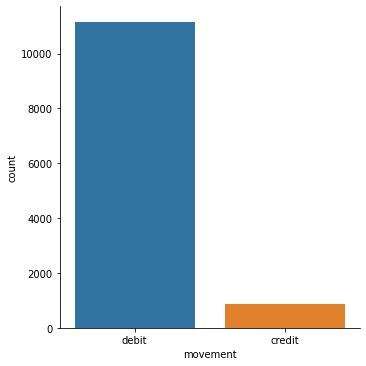

In [41]:
 sns.factorplot('movement', data=xl, kind='count') #testing data by visualising
 #this data graph shows that people spend much more meaning money is debited more than credited.

Average Transaction Amount

In [42]:
transactions = xl[xl.movement == 'debit'] #getting values of all columns only where movement is debit 
AvgtransAmount = transactions['amount']
print(type(AvgtransAmount))
AvgtransAmount.mean()
len(transactions)
#AvgtransAmount.describe()

<class 'pandas.core.series.Series'>


11160

Average number of transactions per month

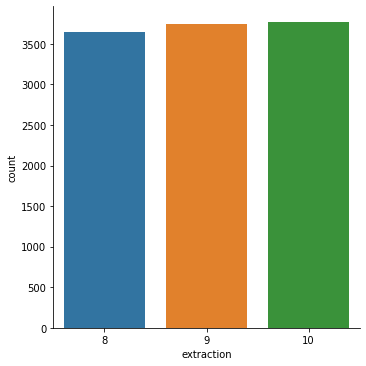

In [47]:
transactions['extraction'] = pd.to_datetime(transactions.extraction) #converting time format in the dataframe to pandas datatime format. Changing only the extraction column
extractionByMonth = transactions.extraction.dt.month #extracting the month data only
extractionByMonth.head()

augustValues = []
septValues = []
octValues = []

for month in extractionByMonth:
    """Seperating months of August for further processing"""
    if month == 8:
        augustValues.append(True)
    else:
        augustValues.append(False)
    
for month in extractionByMonth:
    """Seperating months of August for further processing"""
    if month == 9:
        septValues.append(True)
    else:
        septValues.append(False)
    
for month in extractionByMonth:
    """Seperating months of August for further processing"""
    if month == 10:
        octValues.append(True)
    else:
        octValues.append(False)

augustData = transactions.loc[augustValues] #displays the dataframe with all the other column values that fall in the month of august
septData = transactions.loc[septValues] #displays the dataframe with all the other column values that fall in the month of september
octData = transactions.loc[octValues] #displays the dataframe with all the other column values that fall in the month of october


repeatCust_idAug = pd.DataFrame(augustData, columns=['customer_id']) #finding the repeating items in the column and adding the number of times each customer id is repeated 
repCustTotalAug = repeatCust_idAug.pivot_table(index=['customer_id'], aggfunc='size') #number of times each customer_id has been repeated

repeatCust_idSept = pd.DataFrame(septData, columns=['customer_id']) #finding the repeating items in the column and adding the number of times each customer id is repeated 
repCustTotalSept = repeatCust_idSept.pivot_table(index=['customer_id'], aggfunc='size') #number of times each customer_id has been repeated

repeatCust_idOct = pd.DataFrame(octData, columns=['customer_id']) #finding the repeating items in the column and adding the number of times each customer id is repeated 
repCustTotalOct = repeatCust_idOct.pivot_table(index=['customer_id'], aggfunc='size') #number of times each customer_id has been repeated

c = [repCustTotalAug.mean(), repCustTotalSept.mean(), repCustTotalOct.mean()] 
averageTranPerMonthSeries = pd.Series(averageTranPerMonth)

sns.factorplot(extractionByMonth, data=xl, kind='count')
#print(int(averageTranPerMonthSeries.mean()))

